In [1]:
from acquisitionExtended import * #processing data class and dependencies

#just for style
display(HTML("<style>.container { width:80% !important; }</style>"))
plt.style.use('dark_background')

In [2]:
directoryName='Z:\\Data for Setup Paper\\20230323\\'
logName='Z:\\Data for Setup Paper\\logFiles\\Log_2023-03-23_03-29PM.txt'
dataName='0.4fps_25x_1pLpp_256x256_300Gat695_1_'#'12fps_25x_0.5pLpp_104x30_300Gat695_14_'
Scan0=acquisition(directoryName, dataName)
Scan0.autoCalibrateCCF(logName, FOV50=1733.85) #call CCF (commercial confocal) calibration method for auto-calibration of frame-triggered data
Scan0.xaxis=utils.formAxis(gratingType=0, gratingCentre=695)

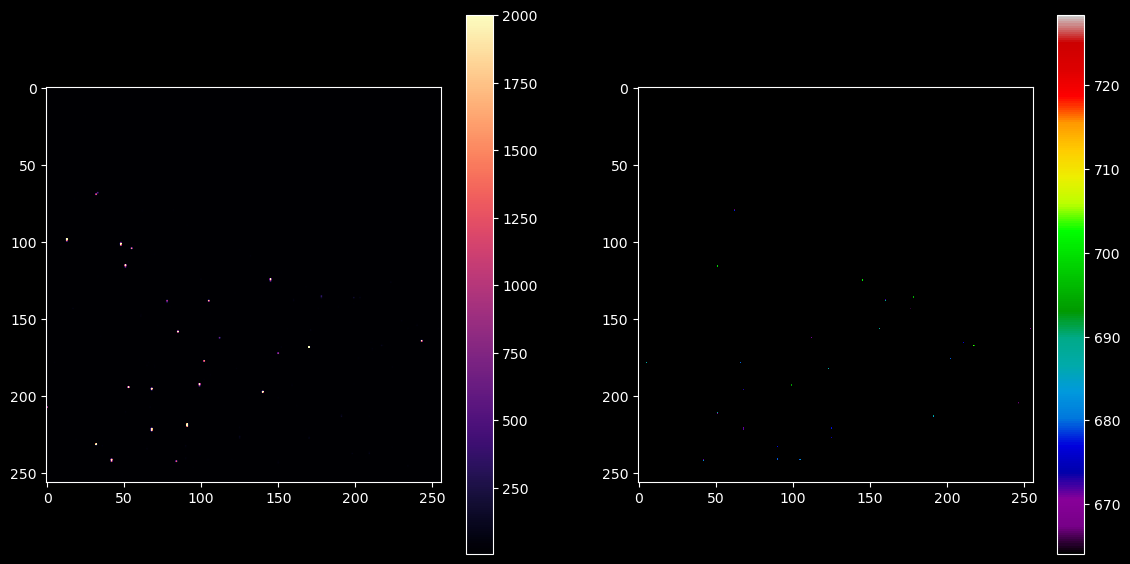

In [3]:
z0=0
t0=0
s01=500
s02=1500
#use the 'CCF' version of the 2D Processing function for 2D images
imap, maxmap = Scan0.constructSpec2DCCF(t0, z0,  s1=s01, s2=s02, threshold=17, specImg=True, show=True, scaleVal=2000)

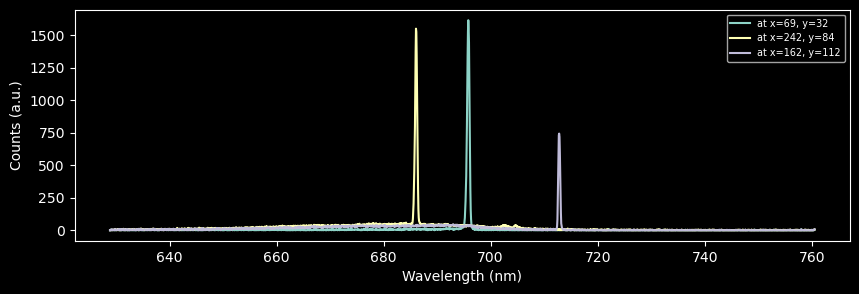

In [4]:
#find some bright pixels to extract the spectrum from
x, y = np.where(imap>300)

#extract some random spectra, again using the CCF version of the retrieval function 
x0=x[1]
y0=y[1]
spec0 = Scan0.getSingleSpectrumCCF(x0, y0, z0, t0)
x1=x[34]
y1=y[34]
spec1 = Scan0.getSingleSpectrumCCF(x1, y1, z0, t0)
x2=x[15]
y2=y[15]
spec2 = Scan0.getSingleSpectrumCCF(x2, y2, z0, t0)

#plot all results, visualizing the spectral window that was used for the hyperspectral colormap
plt.figure(figsize=(10,3))
plt.plot(Scan0.xaxis, spec0, label='at x={}, y={}'.format(x0, y0))
plt.plot(Scan0.xaxis, spec1, label='at x={}, y={}'.format(x1, y1))
plt.plot(Scan0.xaxis, spec2, label='at x={}, y={}'.format(x2, y2))
plt.legend(loc='upper right', fontsize='x-small')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Counts (a.u.)')
#plt.xlim(Scan0.xaxis[s02], Scan0.xaxis[s01])
plt.show()

In [5]:
#process RGBA for hyperspectral color coding
r, g, b = utils.VAtoRGBA(maxmap, imap, 680, 710)

#Create SI Figure 11, panel a
Lims=[0, 1000]
viewer=napari.view_image(imap[50:250, 0:200], colormap='magma', blending = 'additive', contrast_limits=Lims)
viewer.camera.zoom=3
sc=viewer.screenshot(directoryName+'Imap.tif')
viewer.close()

#Create SI Figure 11, panel b
Lims=[0, 3000]
viewer=napari.view_image(r[50:250, 0:200], colormap='red', blending = 'additive', contrast_limits=Lims)
viewer.add_image(g[50:250, 0:200], colormap='green', blending = 'additive', contrast_limits=Lims)
viewer.add_image(b[50:250, 0:200], colormap='blue', blending = 'additive', contrast_limits=Lims)
viewer.camera.zoom=3
sc=viewer.screenshot(directoryName+'Maxmap.tif')
viewer.close()

C:\Users\verat\anaconda3\lib\site-packages\napari\_qt\__init__.py:50: UserWarning: 

napari was tested with QT library `>=5.12.3`.
The version installed is 5.9.7. Please report any issues with
this specific QT version at https://github.com/Napari/napari/issues.
  warn(message=warn_message)


C:\Users\verat\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


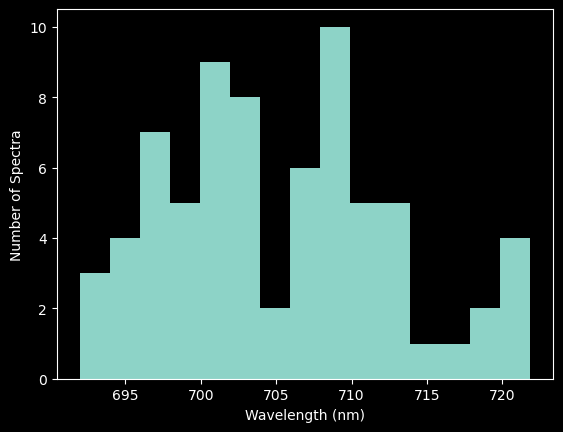

In [6]:
#batch-fit all peaks
Scan0.fitSpectraToFilesCCF( height=20, thresh=40, noPeaks=1)

#retrieve fitted results
peaks, maps = Scan0.ResultsFromFiles( fitted=False)

#display auto-detected peaks as histogram of their peak wavelength
plt.figure()
plt.hist((peaks.flatten())[np.nonzero(peaks.flatten())], bins=15)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Number of Spectra')
plt.show()